# IMPORTING THE REQUIRED LIBRARIES

In [1]:
#Importing necessary libraires for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
nltk.download('stopwords')

#Impoering libraries necessary for Model Building and Training
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.layers import Embedding, Flatten, Dense
from keras.models import Sequential




import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pankil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# LOADING THE DATASET

In [2]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed:0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
df.shape

(5171, 4)

# PRE-PROCESSING THE DATA 

In [4]:
df = df.drop(['Unnamed:0','label'],axis=1)

In [5]:
df = df.rename(columns={'label_num':'spam'})

In [6]:
df.head()

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [7]:
df.shape

(5171, 2)

# VISUALISING THE DATA

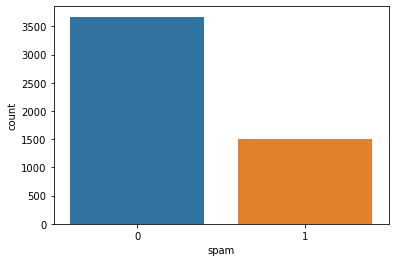

In [8]:
sns.countplot(df['spam'])
plt.show()


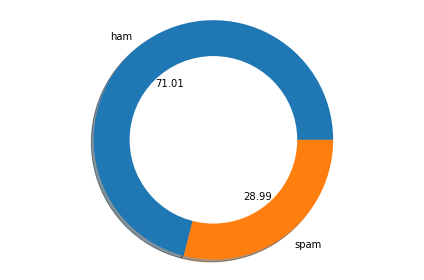

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['spam'].value_counts(), labels=['ham','spam'],autopct="%0.2f", shadow = True)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')  
plt.tight_layout()

plt.show()

# DOWNSAMPLING THE DATA

Text(0.5, 0, 'Message types')

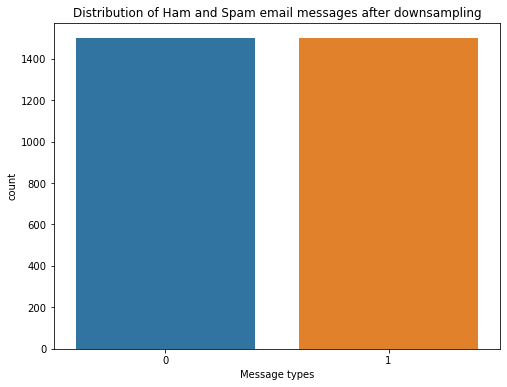

In [10]:
# Downsampling to balance the dataset
ham_msg = df[df.spam == 0]
spam_msg = df[df.spam == 1]
ham_msg = ham_msg.sample(n = len(spam_msg), random_state=42)

# Plotting the counts of down sampled dataset
balanced_data = ham_msg.append(spam_msg).reset_index(drop = True)
plt.figure(figsize = (8, 6))
sns.countplot(balanced_data.spam)
plt.title('Distribution of Ham and Spam email messages after downsampling')
plt.xlabel('Message types')


# HANDLING NULL VALUES 

In [14]:
df.isna().any()

text    False
spam    False
dtype: bool

In [15]:
df.isna().sum()

text    0
spam    0
dtype: int64

# HANDLING DUPLICATE VALUES 

In [16]:
df['text'].nunique()

4993

In [17]:
df['text'].drop_duplicates(inplace = True)

In [18]:
df.shape

(5171, 2)

# REMOVING UNECESSARY WORDS 

In [12]:
df['text'] = df['text'].str.replace('Subject', '')
df.head()

,text,spam
0,: enron methanol ; meter # : 988291\r\nthis is...,0
1,": hpl nom for january 9 , 2001\r\n( see attach...",0
2,": neon retreat\r\nho ho ho , we ' re around to...",0
3,": photoshop , windows , office . cheap . main ...",1
4,: re : indian springs\r\nthis deal is to book ...,0


# REMOVING PUNCTUATIONS FROM THE EMAIL

In [19]:
punctuations_list = string.punctuation
def remove_punctuations(text):
	temp = str.maketrans('', '', punctuations_list)
	return text.translate(temp)

df['text']= df['text'].apply(lambda x: remove_punctuations(x))
df.head()


,text,spam
0,enron methanol meter 988291\r\nthis is a f...,0
1,hpl nom for january 9 2001\r\n see attached ...,0
2,neon retreat\r\nho ho ho we re around to th...,0
3,photoshop windows office cheap main trend...,1
4,re indian springs\r\nthis deal is to book th...,0


# REMOVING STOP WORDS

In [20]:
def remove_stopwords(text):
	stop_words = stopwords.words('english')

	imp_words = []

	# Storing the important words
	for word in str(text).split():
		word = word.lower()

		if word not in stop_words:
			imp_words.append(word)

	output = " ".join(imp_words)

	return output


df['text'] = df['text'].apply(lambda text: remove_stopwords(text))
df.head()


,text,spam
0,enron methanol meter 988291 follow note gave m...,0
1,hpl nom january 9 2001 see attached file hplno...,0
2,neon retreat ho ho ho around wonderful time ye...,0
3,photoshop windows office cheap main trending a...,1
4,indian springs deal book teco pvr revenue unde...,0


# PLOTTING WORD CLOUD 

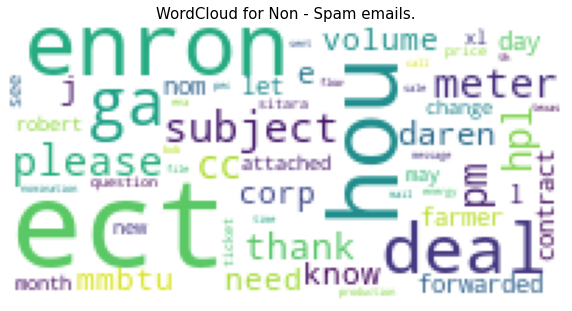

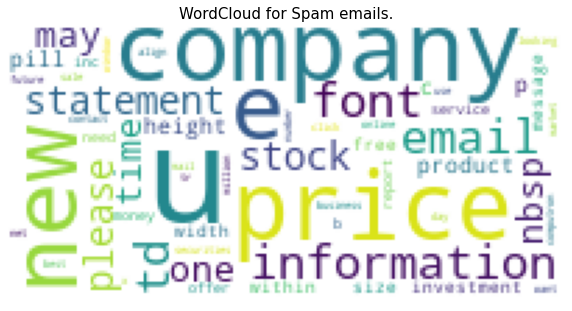

In [21]:
def plot_word_cloud(data, typ):
	email_corpus = " ".join(data['text'])

	plt.figure(figsize=(10, 10))
	wc = WordCloud(background_color='white',
				max_words=100,
				width=200,
				height=100,
				collocations=False).generate(email_corpus)

	plt.title(f'WordCloud for {typ} emails.', fontsize=15)
	plt.axis('off')
	plt.imshow(wc)
	plt.show()
	print()


plot_word_cloud(df[df['spam'] == 0], typ='Non - Spam')
plot_word_cloud(df[df['spam'] == 1], typ='Spam')


In [22]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pankil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['text'].values)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

In [24]:
# Split the text into individual words
words = all_text.split()

In [25]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [26]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('ect', 13900),
 ('hou', 7289),
 ('enron', 6555),
 ('2000', 4386),
 ('com', 3709),
 ('please', 3198),
 ('gas', 3034),
 ('3', 2922),
 ('subject', 2889),
 ('deal', 2827),
 ('1', 2743),
 ('meter', 2459),
 ('00', 2404),
 ('2', 2379),
 ('cc', 2371),
 ('pm', 2343),
 ('hpl', 2318),
 ('000', 2127),
 ('10', 2113),
 ('2001', 2028),
 ('e', 1969),
 ('daren', 1901),
 ('thanks', 1898),
 ('01', 1794),
 ('corp', 1776),
 ('know', 1588),
 ('0', 1586),
 ('4', 1577),
 ('5', 1565),
 ('need', 1480),
 ('11', 1440),
 ('new', 1435),
 ('may', 1381),
 ('mmbtu', 1349),
 ('12', 1345),
 ('j', 1336),
 ('forwarded', 1297),
 ('get', 1275),
 ('http', 1235),
 ('03', 1222),
 ('price', 1206),
 ('see', 1200),
 ('company', 1195),
 ('let', 1159),
 ('information', 1154),
 ('farmer', 1141),
 ('l', 1099),
 ('attached', 1097),
 ('7', 1092),
 ('would', 1078),
 ('99', 1068),
 ('6', 1043),
 ('02', 1040),
 ('xls', 1020),
 ('us', 1015),
 ('day', 1007),
 ('time', 994),
 ('message', 966),
 ('9', 949),
 ('04', 939),
 ('one', 935),
 ('3

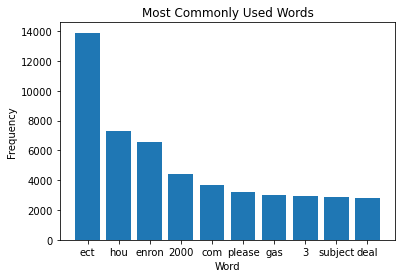

In [27]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# CLASSIFICATION MODEL


In [28]:
import numpy as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score 

In [29]:
x = df['text']
y = df['spam']

In [30]:
x

0       enron methanol meter 988291 follow note gave m...
1       hpl nom january 9 2001 see attached file hplno...
2       neon retreat ho ho ho around wonderful time ye...
3       photoshop windows office cheap main trending a...
4       indian springs deal book teco pvr revenue unde...
                              ...                        
5166    put 10 ft transport volumes decreased 25000 10...
5167    3 4 2000 following noms hpl take extra 15 mmcf...
5168    calpine daily gas nomination julie mention ear...
5169    industrial worksheets august 2000 activity att...
5170    important online banking alert dear valued cit...
Name: text, Length: 5171, dtype: object

In [31]:
y

0       0
1       0
2       0
3       1
4       0
       ..
5166    0
5167    0
5168    0
5169    0
5170    1
Name: spam, Length: 5171, dtype: int64

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=3)


In [33]:
print(x.shape)
print(x_test.shape)
print(x_train.shape)

(5171,)
(1035,)
(4136,)


In [34]:
x_train

2209    hplc wellhead daren list deals need move wellh...
2000    mobil chemical hpl meter 1256 expense transpor...
5030    revised nom 5 5 eastrans revised nom 5 6 follo...
1376    exxon company usa global 96035668 sitara 21222...
1564    pharmacy nx want cheap pain killers http www n...
                              ...                        
789     incr ease yo ur man hood 4 5 inch es g et yo u...
968     subscribers receive first notice run away stoc...
1667    neon march 28 neon lesson march 28 th experien...
3321    first delivery pure resources l p vance deal 5...
1688    enhance chest size email loading image loading...
Name: text, Length: 4136, dtype: object

In [35]:
x_test


4020    anouncing new player market qbbcpryhrv trouble...
3561    87 new software darned cannibalized example mi...
3434    write meter 74 volumes aimee volumes determine...
111     cox exploration darren situation december need...
1126    february buyback deals case want around forwar...
                              ...                        
2078    dpie generic drugs low prices clearence sale v...
334     want quicker computer spyware stays resident m...
4746                   fri feb 11 problem taking vacation
2850    indicter quintus trump verse hi ulysses lowest...
2180    valero gas marketing meter 8018 sitara ticket ...
Name: text, Length: 1035, dtype: object

# FEATURE EXTRACTION

In [36]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase =True)


In [37]:
x_train_features = feature_extraction.fit_transform(x_train)
x_test_features = feature_extraction.transform(x_test)

In [38]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

# LOGISTIC REGRESSION 

In [39]:
# training the logistics regression model
model = LogisticRegression()


In [40]:
model.fit(x_train_features, y_train)


LogisticRegression()

In [41]:
prediction = model.predict(x_train_features)
accuracy = accuracy_score(y_train, prediction)

In [42]:
print('Accuracy on training data : ', accuracy)

Accuracy on training data :  0.9968568665377177


In [43]:
prediction = model.predict(x_test_features)
accuracy = accuracy_score(y_test, prediction)

In [44]:
print('Accuracy on testing data : ', accuracy)

Accuracy on testing data :  0.9816425120772947


# CONFUSIN MATRIX

<AxesSubplot:>

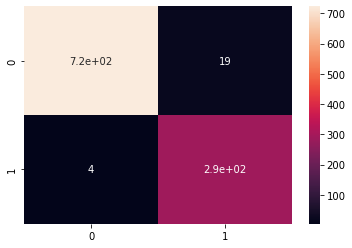

In [61]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

# CALSSIFICATION REPORT

In [62]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       742
           1       0.94      0.99      0.96       293

    accuracy                           0.98      1035
   macro avg       0.97      0.98      0.97      1035
weighted avg       0.98      0.98      0.98      1035



# SPLITTING THE DATA IN THE TRAIN TEST 

In [40]:
#train test split
train_X, test_X, train_Y, test_Y = train_test_split(balanced_data['text'],
													balanced_data['spam'],
													test_size = 0.2,
													random_state = 42)


# CONVERTING TRAINING AND VALIDATION DATA INTO VECTORS

In [41]:
# training the tokenizer
token=Tokenizer(num_words = max_words)
token.fit_on_texts(train_X)

#Generating token embeddings
Training_seq = token.texts_to_sequences(train_X)
Training_pad = pad_sequences(Training_seq,
							maxlen = 50,
							padding = 'post',
							truncating = 'post')

Testing_seq = token.texts_to_sequences(test_X)
Testing_pad = pad_sequences(Testing_seq,
							maxlen = 50,
							padding = 'post',
							truncating = 'post')


# BUILDING THE MODEL

In [42]:
# Building the Model
#max_words = 10000
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(max_words, 32, input_length=50),
tf.keras.layers.LSTM(4),
tf.keras.layers.Dense(32, activation='relu'),
tf.keras.layers.Dense(1, activation='sigmoid')
])


# COMPILING THE MODEL

In [43]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
			metrics = ['accuracy'],
			optimizer = 'adam')


# DEFINING CALLBACK

In [44]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(patience=3,
				monitor = 'val_accuracy',
				restore_best_weights = True)

lr = ReduceLROnPlateau(patience = 2,
					monitor = 'val_loss',
					factor = 0.5,
					verbose = 0)


# FITTING THE DATA IN THE MODEL

In [45]:
history = model.fit(Training_pad, train_Y,
                    validation_data = (Testing_pad, test_Y),
                    epochs = 30,
                    verbose = 1,
                    batch_size = 32,
                    callbacks = [lr, es])


Epoch 1/30
75/75 [==============================] - 12s 69ms/step - loss: 0.6835 - accuracy: 0.6622 - val_loss: 0.6456 - val_accuracy: 0.7733 - lr: 0.0010
Epoch 2/30
75/75 [==============================] - 3s 44ms/step - loss: 0.3991 - accuracy: 0.9145 - val_loss: 0.1971 - val_accuracy: 0.9583 - lr: 0.0010
Epoch 3/30
75/75 [==============================] - 3s 43ms/step - loss: 0.1278 - accuracy: 0.9741 - val_loss: 0.2364 - val_accuracy: 0.9267 - lr: 0.0010
Epoch 4/30
75/75 [==============================] - 3s 41ms/step - loss: 0.0704 - accuracy: 0.9862 - val_loss: 0.1385 - val_accuracy: 0.9633 - lr: 0.0010
Epoch 5/30
75/75 [==============================] - 3s 40ms/step - loss: 0.0337 - accuracy: 0.9950 - val_loss: 0.1652 - val_accuracy: 0.9550 - lr: 0.0010
Epoch 6/30
75/75 [==============================] - 3s 42ms/step - loss: 0.0219 - accuracy: 0.9971 - val_loss: 0.1669 - val_accuracy: 0.9567 - lr: 0.0010
Epoch 7/30
75/75 [==============================] - 3s 44ms/step - loss: 0.

# EVALUATING THE MODEL ON THE TEST DATA

In [46]:
model.evaluate(Testing_pad, test_Y)


19/19 [==============================] - 0s 10ms/step - loss: 0.1385 - accuracy: 0.9633


[0.1384720504283905, 0.9633333086967468]

# PLOTTING THE MODEL ACCURACY

Text(0.5, 0, 'epoch')

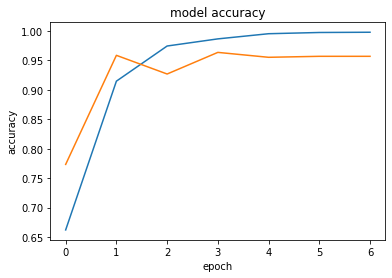

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')


# BUILDING A PREDICTIVE SYSTEM

In [63]:
input_mail = ["WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]

In [64]:
input_mail_features = feature_extraction.transform(input_mail)


In [65]:
prediction_new =model.predict(input_mail_features)


In [66]:
print(prediction_new)


[1]


In [67]:
if prediction_new[0]==0:
    print('ham mail')
    
else:
    print('spam mail')

spam mail
